# Plotting the Output Data From the Simulation Experiments

### Import Packages

In [1]:
import climlab
import numpy as np
import phys
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Import Calculated Heights file from Simulation

In [10]:
path = './Data/'

heights_mois_raw = xr.open_dataset(path + 'heights_mois_case.nc')
heights_temp_raw = xr.open_dataset(path + 'heights_temp_case.nc')
ts_2m = xr.open_dataset(path + 'ts_2m.nc', decode_times=False)
temp = xr.open_dataset(path + 'temp.nc', decode_times=False)
olrs = xr.open_dataset(path + 'olrs_ltmm.nc')

lats = temp.lat.values
lons = temp.lon.values
lon_long = temp.lon.values

### Add Cyclic Points and Flip Data

In [11]:
heights_mois = np.zeros((len(lats), len(lons)))
heights_mois, lons = add_cyclic_point(heights_mois, coord=lons)
lons = temp.lon.values

heights_temp = np.zeros((len(lats), len(lons)))
heights_temp, lon_long = add_cyclic_point(heights_temp, coord=lon_long)

for i in range(len(lats)):
    for j in range(len(lons)):
        heights_mois[i,j] = heights_mois_raw.height.values[i,j]
        heights_temp[i,j] = heights_temp_raw.height.values[i,j]

heights_mois[:,len(lons)] = heights_mois[:,0]
heights_temp[:,len(lons)] = heights_temp[:,0]

heights_mois = np.flip(heights_mois, axis=0)
heights_temp = np.flip(heights_temp, axis=0)

### Plotting

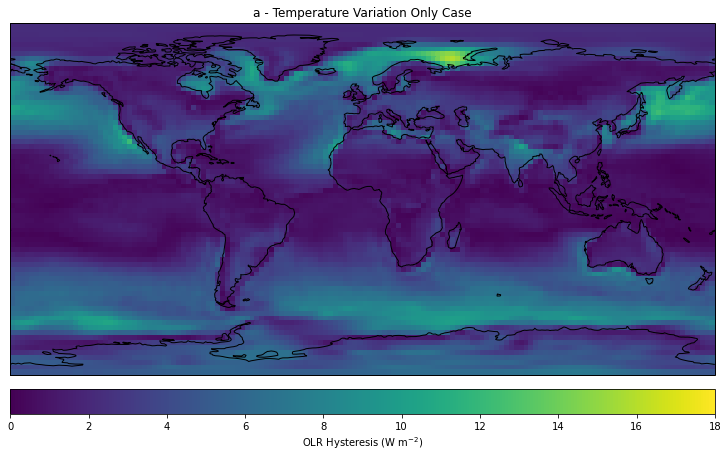

In [15]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

maxheight = 18

ax2 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, heights_temp, transform=ccrs.PlateCarree())
#if samescale:
C2.set_clim(vmin=0,vmax=maxheight)
ax2.set_title('a - Temperature Variation Only Case')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
#plt.savefig(path + 'temperature case.png', bbox_inches='tight')

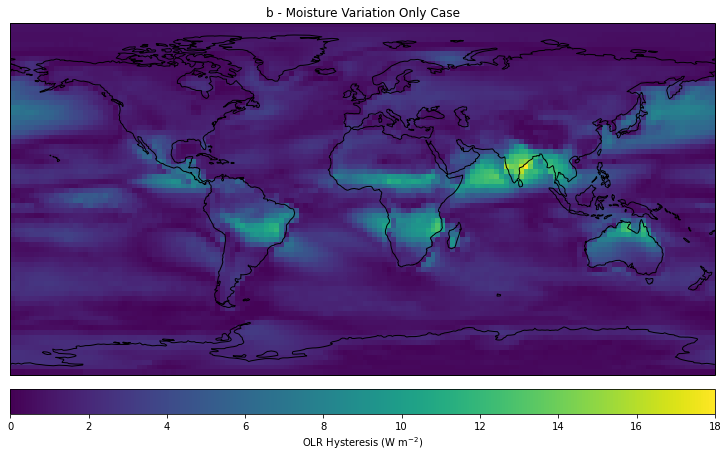

In [13]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

maxheight = 18

ax2 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, heights_mois, transform=ccrs.PlateCarree())
#if samescale:
C2.set_clim(vmin=0,vmax=maxheight)
ax2.set_title('b - Moisture Variation Only Case')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
#plt.savefig(path + 'Moisture case.png', bbox_inches='tight')